In [1]:
%matplotlib inline
import os
import math
import time
import tarfile
import shutil
import aplpy as ap
import numpy as np
from astropy import wcs
import matplotlib as mpl
import matplotlib.pyplot as plt
import montage_wrapper as mt
from scipy.integrate import quad
from astropy.io import ascii
from astropy.io import fits
from astropy.table import Table, Column, vstack
from astropy import units as u
import astropy.coordinates as coords
import astropy.constants as cons
from lmfit import minimize, Parameters, Model
mpl.rc('text', usetex=False)


/Users/yuan/anaconda/lib/python3.5/site-packages/matplotlib/artist.py:224: MatplotlibDeprecationWarning: get_axes has been deprecated in mpl 1.5, please use the
axes property.  A removal date has not been set.
  stacklevel=1)


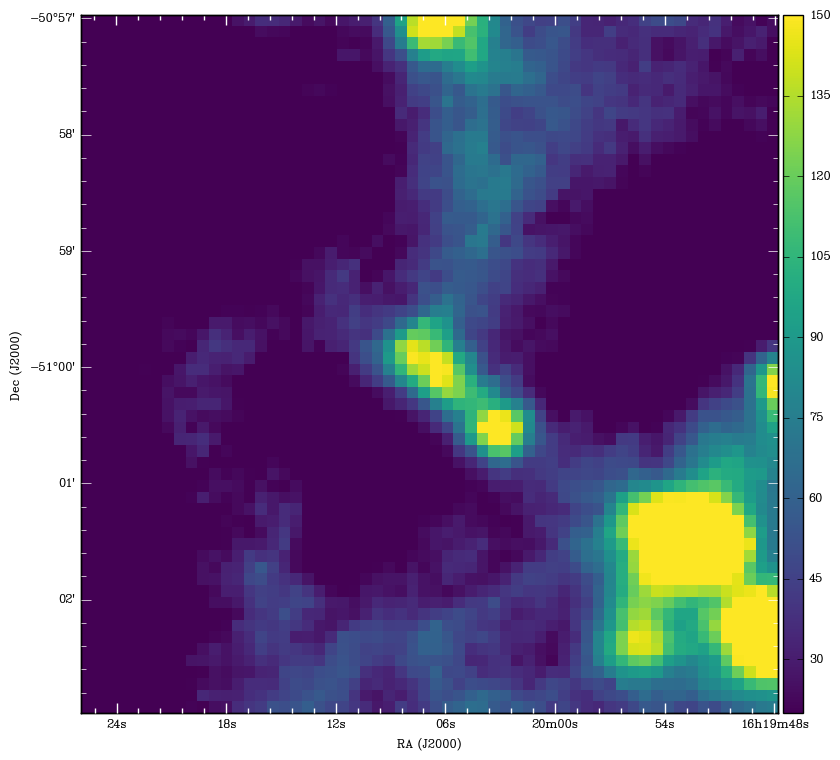

In [4]:
%matplotlib inline

fitsFile = '../fitsDir/sedFitting/ATLASGAL/G332.7393-0.6211_870.fits'
hdus = fits.open(fitsFile)
ra_0,dec_0 = hdus[0].header['CRVAL1'],hdus[0].header['CRVAL2']
fb = ap.FITSFigure(hdus)
fb.show_colorscale(cmap = 'viridis', vmin = 20, vmax = 150)
fb.show_colorbar()
fb.recenter(ra_0,dec_0,radius = 3/60)
#fb.set_system_latex(True)
#fb.tick_labels.hide()
fb.set_tick_labels_xformat('hhmmss')
fb.set_tick_labels_yformat('ddmm')

In [5]:
a1 = 21.5/3600.0/hdus[0].header['CDELT2']
b1 = 13/3600.0/hdus[0].header['CDELT2']
pa = 48.333761216*u.deg
paRad = pa.cgs.value
w = wcs.WCS(hdus[0].header)
centerPix = w.wcs_world2pix(np.array([[ra_0,dec_0]]),0)
x0, y0 = centerPix[0][0], centerPix[0][1]
y,x = np.indices(hdus[0].data.shape)
inside1 = ((((y-y0)*np.sin(paRad)+(x-x0)*np.cos(paRad))/b1)**2
               +(((y-y0)*np.cos(paRad)-(x-x0)*np.sin(paRad))/a1)**2
               <1)
newHDU = hdus.copy()
newHDU[0].data[inside1]=0

/Users/yuan/anaconda/lib/python3.5/site-packages/matplotlib/artist.py:224: MatplotlibDeprecationWarning: get_axes has been deprecated in mpl 1.5, please use the
axes property.  A removal date has not been set.
  stacklevel=1)


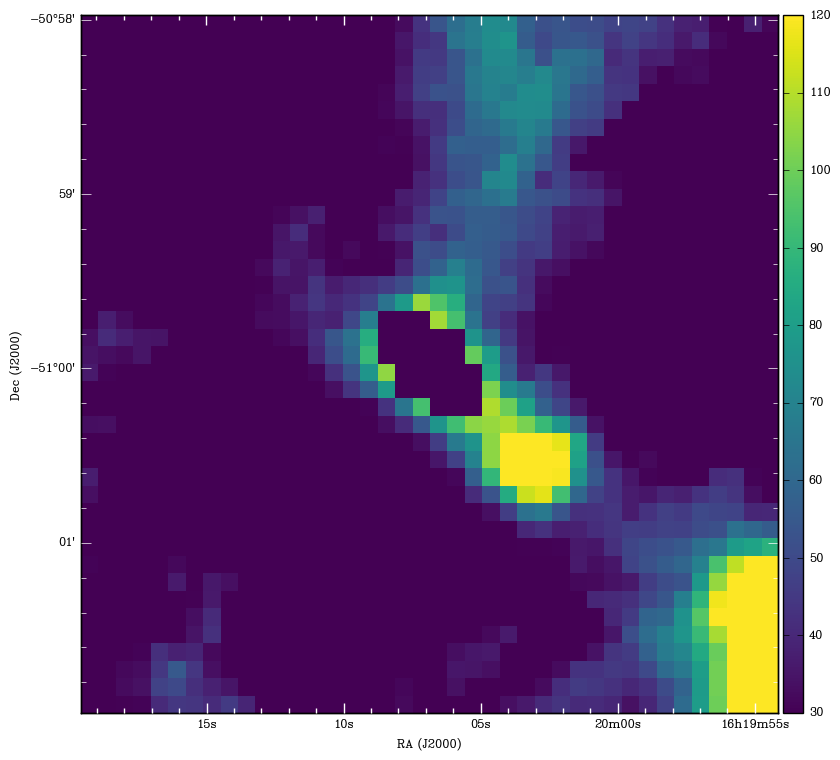

In [7]:

fb = ap.FITSFigure(hdus)
fb.show_colorscale(cmap = 'viridis', vmin = 30, vmax = 120)
fb.show_colorbar()
fb.recenter(ra_0, dec_0,
            radius = 2/60)

fb.set_tick_labels_xformat('hhmmss')
fb.set_tick_labels_yformat('ddmm')